# Предсказание поведения пользователей в маркетплейсе

# <span style='color:RoyalBlue'>Описание проекта</span>

<span style='font-size:18px'>

Интернет-магазин собирает историю покупателей, проводит рассылки предложений и
планирует будущие продажи. Для оптимизации процессов надо выделить пользователей,
которые готовы совершить покупку в ближайшее время.

# <span style='color:RoyalBlue'>Цели иследования</span>

<span style='font-size:18px'>
- Предсказать вероятность покупки в течение 90 дней.

# <span style='color:RoyalBlue'>Описание данных</span>

<span style="font-size: 18px;">**Фаил даннных для иследования: `apparel-purchases.csv` со следующими колонками:**</span>

- <span style='color:red'>**client_id**</span> — идентификатор клиента;
- <span style='color:blue'>**quantity**</span> — количество единиц товара;
- <span style='color:blue'>**price**</span> — цена товара;
- <span style='color:red'>**category_ids**</span> — идентификаторы категорий;
- <span style='color:blue'>**date**</span> — дата покупки;
- <span style='color:red'>**message_id**</span> — идентификатор сообщения из рассылки.
<span style='font-size:18px'>
Данные о покупках клиентов по дням и по товарам. В каждой записи покупка
определенного товара, его цена, количество штук.

В таблице есть списки идентификаторов, к каким категориям относится товар. Часто
это вложенные категории (например автотовары-аксессуары-освежители), но также может
включать в начале списка маркер распродажи или маркер женщинам/мужчинам.

Нумерация категорий сквозная для всех уровней, то есть 44 на второй позиции списка
или на третьей – это одна и та же категория. Иногда дерево категорий обновляется, поэтому
могут меняться вложенности, например ['4', '28', '44', '1594'] или ['4', '44', '1594']. Как
обработать такие случаи – можете предлагать свои варианты решения.

<span style="font-size: 18px;">**Фаил даннных для иследования: `apparel-messages.csv` со следующими колонками:**</span>

- <span style='color:red'>**bulk_campaign_id**</span> — идентификатор рассылки;
- <span style='color:red'>**client_id**</span> — идентификатор клиента;
- <span style='color:red'>**message_id**</span> — идентификатор сообщения;
- <span style='color:blue'>**event**</span> — действие с сообщением (отправлено, открыто, покупка…);
- <span style='color:blue'>**channel**</span> — канал рассылки;
- <span style='color:blue'>**date**</span> — дата действия;
- <span style='color:blue'>**created_at**</span> — дата-время полностью;
<span style='font-size:18px'>
Рассылки, которые были отправлены клиентам из таблицы покупок.

<span style="font-size: 18px;">**Фаил даннных для иследования: `apparel-target_binary.csv` со следующими колонками:**</span>

- <span style='color:red'>**client_id**</span> — идентификатор клиента;
- <span style='color:green'>**target**</span> — клиент совершил покупку в целевом периоде.

<span style="font-size: 18px;">**Фаил даннных для иследования: `full_campaign_daily_event.csv` со следующими колонками:**</span>

- <span style='color:blue'>**date**</span> — дата;
- <span style='color:red'>**bulk_campaign_id**</span> — идентификатор рассылки;
- <span style='color:blue'>**count_event<span style='color:red'>*</span>**</span> — общее количество каждого события event;
- <span style='color:blue'>**nunique_event<span style='color:red'>*</span>**</span> — количество уникальных client_id в каждом событии.
<span style='font-size:18px'>
<span style='color:red'>*</span><b>в именах колонок найдете все типы событий event</b>

Агрегация общей базы рассылок по дням и типам событий

<span style="font-size: 18px;">**Фаил даннных для иследования: `full_campaign_daily_event_channel.csv` со следующими колонками:**</span>

- <span style='color:blue'>**date**</span> — дата;
- <span style='color:red'>**bulk_campaign_id**</span> — идентификатор рассылки;
- <span style='color:blue'>**count_event*_channel<span style='color:red'>*</span>**</span> — общее количество каждого события по каналам;
- <span style='color:blue'>**nunique_event*_channel<span style='color:red'>*</span>**</span> — количество уникальных client_id по событиям и каналам.
<span style='font-size:18px'>
<span style='color:red'>*</span><b>в именах колонок есть все типы событий event и каналов рассылки channel</b>

Агрегация по дням с учетом событий и каналов рассылки

# <span style='color:RoyalBlue'>Содержание</span>

- <span style='font-size: 18px;color: RoyalBlue'>Описание проекта</span>
- <span style='font-size: 18px;color: RoyalBlue'>Цели иследования</span>
- <span style='font-size: 18px;color: RoyalBlue'>Описание данных</span>
- <span style='font-size: 18px;color: RoyalBlue'>Содержание</span>
- <span style='font-size: 18px;color: Blue'>1. Шаг. Подгруска необходимых модулей и настройка необходимых констант</span>
- <span style='font-size: 18px;color: Blue'>2. Шаг. Загрузка данных</span>
- <span style='font-size: 18px;color: Blue'>3. Шаг. Предобработка данных</span>
- <span style='font-size: 18px;color: Blue'>4. Шаг. Исследовательский анализ данных</span>
- <span style='font-size: 18px;color: Blue'>5. Шаг. Объеденения датафреймов</span>
- <span style='font-size: 18px;color: Blue'>6. Шаг. Разработка полезных признаков
- <span style='font-size: 18px;color: Blue'>7. Шаг. Корреляционный анализ</span>
- <span style='font-size: 18px;color: Blue'>8. Шаг. Подготовка к обучению</span>
- <span style='font-size: 18px;color: Blue'>9. Шаг. Обучение улучшей модели</span>
- <span style='font-size: 18px;color: Blue'>10. Шаг. Проанализируем обученые модели</span>
- <span style='font-size: 18px;color: RoyalBlue'>Итоговые выводы</span>

## <span style='color:Blue'>Шаг. Подгруска необходимых модулей и настройка необходимых констант</span>

In [1]:
import warnings

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import (
    train_test_split,
    RandomizedSearchCV,
)
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler,
    MinMaxScaler,
    RobustScaler,
    OrdinalEncoder,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import  DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from scipy.stats import randint, uniform

import phik
from wordcloud import WordCloud

In [2]:
# Вывод ошибок
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
# Настройки numpy
np.seterr(divide = 'ignore');
# Настройки pandas
pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
# Создадим константы
RANDOM_STATE = 12345
TEST_SIZE = 0.25

In [4]:
# Общий путь к папккам
folder_location = './datasets/'

## <span style='color:Blue'> Шаг. Загрузка данных</span>

**Задача 2.1. Создание финкции вывода первичной информации.**

In [5]:
def primary_information_output(dataset):
    # Функция вывод первичной информации
    # Первичная информация
    dataset.info()
    # О пропусках и их доля
    print('Количество пропущеных значений и их доля:')
    number_of_entries = dataset.shape[0]
    preliminary_frame = pd.DataFrame(
        {
            'Наименование признака': [],
            'Количество пропущеных': [],
            'Доля пропущеных': [],
        }
    )
    for key, value in dataset.isna().sum().items():
        preliminary_frame.loc[len(preliminary_frame)] = [
            key,
            value,
            (value / number_of_entries),
        ]
    display(preliminary_frame)
    # Информация о полных дублях
    number_of_complete_takes = dataset.duplicated().sum()
    percentage_of_complete_takes = number_of_complete_takes / number_of_entries
    text = 'Количество полных дублированых строк в дата фрейме'
    print(f'{text} = {number_of_complete_takes}, Доля полных дублей = {percentage_of_complete_takes:.1%}')
    # Вывод первых 5 строк фрейма
    display(dataset.head())

**Задача 2.2. Загруска данных из `apparel-purchases.csv` и первое знакомство с датафрейм <span style='color:red'>ap</span>.**

In [6]:
# Прочитываю csv-файл
ap = pd.read_csv(
    f'{folder_location}apparel-purchases.csv',
    sep=',',
    parse_dates=['date',]
)

In [7]:
# Показываю информацию о дата сете
primary_information_output(ap)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202208 entries, 0 to 202207
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   client_id     202208 non-null  int64         
 1   quantity      202208 non-null  int64         
 2   price         202208 non-null  float64       
 3   category_ids  202208 non-null  object        
 4   date          202208 non-null  datetime64[ns]
 5   message_id    202208 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 9.3+ MB
Количество пропущеных значений и их доля:


,Наименование признака,Количество пропущеных,Доля пропущеных
0,client_id,0,0.00
1,quantity,0,0.00
2,price,0,0.00
3,category_ids,0,0.00
4,date,0,0.00
5,message_id,0,0.00


Количество полных дублированых строк в дата фрейме = 73020, Доля полных дублей = 36.1%


,client_id,quantity,price,category_ids,date,message_id
0,1515915625468169594,1,"1,999.00","['4', '28', '57', '431']",2022-05-16,1515915625468169594-4301-627b661e9736d
1,1515915625468169594,1,"2,499.00","['4', '28', '57', '431']",2022-05-16,1515915625468169594-4301-627b661e9736d
2,1515915625471138230,1,"6,499.00","['4', '28', '57', '431']",2022-05-16,1515915625471138230-4437-6282242f27843
3,1515915625471138230,1,"4,999.00","['4', '28', '244', '432']",2022-05-16,1515915625471138230-4437-6282242f27843
4,1515915625471138230,1,"4,999.00","['4', '28', '49', '413']",2022-05-16,1515915625471138230-4437-6282242f27843


**<span style='color:green'>Мини вывод:</span>**

- Хорошое наименование столбцов
- Присутствуют полные дубли
- Отсутствуют пропуски
- Типу соответствуют
- Столбец `message_id` имеет трёх группавую структуру через `-`. 1) - `client_id`  2) - `bulk_campaign_id` 3) - `<Индификатор сообщения>`

**Задача 2.3. Загруска данных из `apparel-messages.csv` и первое знакомство с датафрейм <span style='color:red'>am</span>.**

In [8]:
# Прочитываю csv-файл
am = pd.read_csv(
    f'{folder_location}apparel-messages.csv',
    sep=',',
    parse_dates=['date', 'created_at']
)

In [9]:
# Показываю информацию о дата сете
primary_information_output(am)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12739798 entries, 0 to 12739797
Data columns (total 7 columns):
 #   Column            Dtype         
---  ------            -----         
 0   bulk_campaign_id  int64         
 1   client_id         int64         
 2   message_id        object        
 3   event             object        
 4   channel           object        
 5   date              datetime64[ns]
 6   created_at        datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(3)
memory usage: 680.4+ MB
Количество пропущеных значений и их доля:


,Наименование признака,Количество пропущеных,Доля пропущеных
0,bulk_campaign_id,0,0.00
1,client_id,0,0.00
2,message_id,0,0.00
3,event,0,0.00
4,channel,0,0.00
5,date,0,0.00
6,created_at,0,0.00


Количество полных дублированых строк в дата фрейме = 48610, Доля полных дублей = 0.4%


,bulk_campaign_id,client_id,message_id,event,channel,date,created_at
0,4439,1515915625626736623,1515915625626736623-4439-6283415ac07ea,open,email,2022-05-19,2022-05-19 00:14:20
1,4439,1515915625490086521,1515915625490086521-4439-62834150016dd,open,email,2022-05-19,2022-05-19 00:39:34
2,4439,1515915625553578558,1515915625553578558-4439-6283415b36b4f,open,email,2022-05-19,2022-05-19 00:51:49
3,4439,1515915625553578558,1515915625553578558-4439-6283415b36b4f,click,email,2022-05-19,2022-05-19 00:52:20
4,4439,1515915625471518311,1515915625471518311-4439-628341570c133,open,email,2022-05-19,2022-05-19 00:56:52


**<span style='color:green'>Мини вывод:</span>**

- Присутствуют Дубли
- Хорошее наименование
- Соответствуют типу данных
- Отсутствуют пропуски
- Столбец `message_id` имеет трёх группавую структуру через `-`. 1) - `client_id` 2) - `bulk_campaign_id` 3) - `<Индификатор сообщения>`

**Задача 2.4. Загруска данных из `apparel-target_binary.csv` и первое знакомство с датафрейм <span style='color:red'>atb</span>.**

In [10]:
# Прочитываю csv-файл
atb = pd.read_csv(
    f'{folder_location}apparel-target_binary.csv',
    sep=',',
)

In [11]:
# Показываю информацию о дата сете
primary_information_output(atb)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49849 entries, 0 to 49848
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   client_id  49849 non-null  int64
 1   target     49849 non-null  int64
dtypes: int64(2)
memory usage: 779.0 KB
Количество пропущеных значений и их доля:


,Наименование признака,Количество пропущеных,Доля пропущеных
0,client_id,0,0.00
1,target,0,0.00


Количество полных дублированых строк в дата фрейме = 0, Доля полных дублей = 0.0%


,client_id,target
0,1515915625468060902,0
1,1515915625468061003,1
2,1515915625468061099,0
3,1515915625468061100,0
4,1515915625468061170,0


**<span style='color:green'>Мини вывод:</span>**

- Отсутствуют полных дублей
- Хорошее наименование
- Не соответствуют типу данных `target` лучше будет тип bool
- Отсутствуют пропуски

**Задача 2.5. Загруска данных из `full_campaign_daily_event.csv` и первое знакомство с датафрейм <span style='color:red'>de</span>.**

In [12]:
# Прочитываю csv-файл
de = pd.read_csv(
    f'{folder_location}full_campaign_daily_event.csv',
    sep=',',
    parse_dates=['date',]
)

In [13]:
# Показываю информацию о дата сете
primary_information_output(de)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131072 entries, 0 to 131071
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   date                 131072 non-null  datetime64[ns]
 1   bulk_campaign_id     131072 non-null  int64         
 2   count_click          131072 non-null  int64         
 3   count_complain       131072 non-null  int64         
 4   count_hard_bounce    131072 non-null  int64         
 5   count_open           131072 non-null  int64         
 6   count_purchase       131072 non-null  int64         
 7   count_send           131072 non-null  int64         
 8   count_soft_bounce    131072 non-null  int64         
 9   count_subscribe      131072 non-null  int64         
 10  count_unsubscribe    131072 non-null  int64         
 11  nunique_click        131072 non-null  int64         
 12  nunique_complain     131072 non-null  int64         
 13  nunique_hard_b

,Наименование признака,Количество пропущеных,Доля пропущеных
0,date,0,0.00
1,bulk_campaign_id,0,0.00
2,count_click,0,0.00
3,count_complain,0,0.00
4,count_hard_bounce,0,0.00
5,count_open,0,0.00
6,count_purchase,0,0.00
7,count_send,0,0.00
8,count_soft_bounce,0,0.00
9,count_subscribe,0,0.00


Количество полных дублированых строк в дата фрейме = 0, Доля полных дублей = 0.0%


,date,bulk_campaign_id,count_click,count_complain,count_hard_bounce,count_open,count_purchase,count_send,count_soft_bounce,count_subscribe,...,nunique_open,nunique_purchase,nunique_send,nunique_soft_bounce,nunique_subscribe,nunique_unsubscribe,count_hbq_spam,nunique_hbq_spam,count_close,nunique_close
0,2022-05-19,563,0,0,0,4,0,0,0,0,...,4,0,0,0,0,0,0,0,0,0
1,2022-05-19,577,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2022-05-19,622,0,0,0,2,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
3,2022-05-19,634,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,2022-05-19,676,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [14]:
# Проверка наименования
de.columns

Index(['date', 'bulk_campaign_id', 'count_click', 'count_complain',
       'count_hard_bounce', 'count_open', 'count_purchase', 'count_send',
       'count_soft_bounce', 'count_subscribe', 'count_unsubscribe',
       'nunique_click', 'nunique_complain', 'nunique_hard_bounce',
       'nunique_open', 'nunique_purchase', 'nunique_send',
       'nunique_soft_bounce', 'nunique_subscribe', 'nunique_unsubscribe',
       'count_hbq_spam', 'nunique_hbq_spam', 'count_close', 'nunique_close'],
      dtype='object')

**<span style='color:green'>Мини вывод:</span>**

- Отсутствуют полных дублей
- Хорошее наименование
- Сложно судить о типе данных нужно проверять каждый как его применять в дальше
- Отсутствуют пропуски

**Задача 2.6. Загруска данных из `full_campaign_daily_event_channel.csv` и первое знакомство с датафрейм <span style='color:red'>deс</span>.**

In [15]:
# Прочитываю csv-файл
dec = pd.read_csv(
    f'{folder_location}full_campaign_daily_event_channel.csv',
    sep=',',
    parse_dates=['date',]
)

In [16]:
# Показываю информацию о дата сете
primary_information_output(dec)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131072 entries, 0 to 131071
Data columns (total 36 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   date                             131072 non-null  datetime64[ns]
 1   bulk_campaign_id                 131072 non-null  int64         
 2   count_click_email                131072 non-null  int64         
 3   count_click_mobile_push          131072 non-null  int64         
 4   count_open_email                 131072 non-null  int64         
 5   count_open_mobile_push           131072 non-null  int64         
 6   count_purchase_email             131072 non-null  int64         
 7   count_purchase_mobile_push       131072 non-null  int64         
 8   count_soft_bounce_email          131072 non-null  int64         
 9   count_subscribe_email            131072 non-null  int64         
 10  count_unsubscribe_email          131072 non-

,Наименование признака,Количество пропущеных,Доля пропущеных
0,date,0,0.00
1,bulk_campaign_id,0,0.00
2,count_click_email,0,0.00
3,count_click_mobile_push,0,0.00
4,count_open_email,0,0.00
5,count_open_mobile_push,0,0.00
6,count_purchase_email,0,0.00
7,count_purchase_mobile_push,0,0.00
8,count_soft_bounce_email,0,0.00
9,count_subscribe_email,0,0.00


Количество полных дублированых строк в дата фрейме = 0, Доля полных дублей = 0.0%


,date,bulk_campaign_id,count_click_email,count_click_mobile_push,count_open_email,count_open_mobile_push,count_purchase_email,count_purchase_mobile_push,count_soft_bounce_email,count_subscribe_email,...,count_send_email,nunique_hard_bounce_email,nunique_hbq_spam_email,nunique_send_email,count_soft_bounce_mobile_push,nunique_soft_bounce_mobile_push,count_complain_email,nunique_complain_email,count_close_mobile_push,nunique_close_mobile_push
0,2022-05-19,563,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2022-05-19,577,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2022-05-19,622,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2022-05-19,634,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2022-05-19,676,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Проверка наименования
dec.columns

Index(['date', 'bulk_campaign_id', 'count_click_email',
       'count_click_mobile_push', 'count_open_email', 'count_open_mobile_push',
       'count_purchase_email', 'count_purchase_mobile_push',
       'count_soft_bounce_email', 'count_subscribe_email',
       'count_unsubscribe_email', 'nunique_click_email',
       'nunique_click_mobile_push', 'nunique_open_email',
       'nunique_open_mobile_push', 'nunique_purchase_email',
       'nunique_purchase_mobile_push', 'nunique_soft_bounce_email',
       'nunique_subscribe_email', 'nunique_unsubscribe_email',
       'count_hard_bounce_mobile_push', 'count_send_mobile_push',
       'nunique_hard_bounce_mobile_push', 'nunique_send_mobile_push',
       'count_hard_bounce_email', 'count_hbq_spam_email', 'count_send_email',
       'nunique_hard_bounce_email', 'nunique_hbq_spam_email',
       'nunique_send_email', 'count_soft_bounce_mobile_push',
       'nunique_soft_bounce_mobile_push', 'count_complain_email',
       'nunique_complain_email', 

**<span style='color:green'>Мини вывод:</span>**

- Отсутствуют полных дублей
- Хорошее наименование
- Сложно судить о типе данных нужно проверять каждый как его применять в дальше
- Отсутствуют пропуски

**<span style='color:Purple'>Вывод шага:</span>**

- Столбец `message_id` имеет трёх группавую структуру через `-`. 1) - `client_id`  2) - `bulk_campaign_id` 3) - `<Индификатор сообщения>`
- Есть дубли но эта скорей всего и за не полном представление всей таблицы
- Хорошее наименование солонок
- Разнообразных признаков очень много у датафреймов `de` и `dec`
- Отсутствуют пропуски
- Есть где можно поменять тип данных нужно расмотреть тчательнее

## <span style='color:Blue'> Шаг. Предобработка данных</span>

**Задача 3.1.1. Получение информации о датафрейме <span style='color:red'>ap</span>**

In [18]:
# Показываю информацию о дата сете
primary_information_output(ap)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202208 entries, 0 to 202207
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   client_id     202208 non-null  int64         
 1   quantity      202208 non-null  int64         
 2   price         202208 non-null  float64       
 3   category_ids  202208 non-null  object        
 4   date          202208 non-null  datetime64[ns]
 5   message_id    202208 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 9.3+ MB
Количество пропущеных значений и их доля:


,Наименование признака,Количество пропущеных,Доля пропущеных
0,client_id,0,0.00
1,quantity,0,0.00
2,price,0,0.00
3,category_ids,0,0.00
4,date,0,0.00
5,message_id,0,0.00


Количество полных дублированых строк в дата фрейме = 73020, Доля полных дублей = 36.1%


,client_id,quantity,price,category_ids,date,message_id
0,1515915625468169594,1,"1,999.00","['4', '28', '57', '431']",2022-05-16,1515915625468169594-4301-627b661e9736d
1,1515915625468169594,1,"2,499.00","['4', '28', '57', '431']",2022-05-16,1515915625468169594-4301-627b661e9736d
2,1515915625471138230,1,"6,499.00","['4', '28', '57', '431']",2022-05-16,1515915625471138230-4437-6282242f27843
3,1515915625471138230,1,"4,999.00","['4', '28', '244', '432']",2022-05-16,1515915625471138230-4437-6282242f27843
4,1515915625471138230,1,"4,999.00","['4', '28', '49', '413']",2022-05-16,1515915625471138230-4437-6282242f27843


**Задача 3.1.2. Анализ временых данных**

In [19]:
# Проверка что хранится в ячейках
ap[['date',]].describe()

,date
count,202208
mean,2023-03-17 02:49:35.739832064
min,2022-05-16 00:00:00
25%,2022-11-12 00:00:00
50%,2023-04-12 00:00:00
75%,2023-07-03 00:00:00
max,2024-02-16 00:00:00


**<span style='color:green'>Мини вывод:</span>**

-  Период данных с `2022.05.16` по `2024.02.16`

**Задача 3.1.3. Анализ количественные данные**

In [20]:
def table_describe_quantitative_values(dataset: object) -> object:
    # Вывод основныхз показателей количественных данных
    num_col_names = dataset.select_dtypes(['int', 'float']).columns.tolist()
    display(dataset[num_col_names].describe())

In [21]:
# Вывод основныхз показателей количественных данных
table_describe_quantitative_values(ap)

,client_id,quantity,price
count,"202,208.00","202,208.00","202,208.00"
mean,"1,515,915,625,596,210,944.00",1.01,"1,193.30"
std,"145,945,755.93",0.18,"1,342.25"
min,"1,515,915,625,468,060,928.00",1.00,1.00
25%,"1,515,915,625,490,081,280.00",1.00,352.00
50%,"1,515,915,625,557,177,088.00",1.00,987.00
75%,"1,515,915,625,624,391,936.00",1.00,"1,699.00"
max,"1,515,915,626,010,443,520.00",30.00,"85,499.00"


**<span style='color:green'>Мини вывод:</span>**

- Покупки в основном купленые по штуке
- Товар за `1рубль` Странно это ??? 1) Возможно скидка 2) Специальное выграшное предложение 3) Возможно ошибка

**Задача 3.1.4. Анализ категориальных данных**

In [22]:
def list_unique_values_categorical_features(dataset: object) -> str:
    # Выводит список уникальных значений категориальных признаков
    cat_col_names = dataset.select_dtypes(['object', 'bool']).columns.tolist()
    for col in cat_col_names:
        print('-Категория:------------------------------------------------')
        print(f"                       <{col}>")
        print('-----------------------------------------------------------')
        print(f"- Уникальные значения категории:")
        print(dataset[col].unique())
        print(f"- Количество значений по уникальности в категории:")
        print(dataset[col].value_counts())
        if dataset[col].isna().sum() > 0:
            print(f"- Пропущеных значений NAN:")
            print(f'Количество: {dataset[col].isna().sum()}')
            print(f'Доля пропущеных значений:  {dataset[col].isna().sum() / dataset.shape[0]:.2%}')
        print('-----------------------------------------------------------')

In [23]:
# Вывод уникальных значений категориальных признаков
list_unique_values_categorical_features(ap)

-Категория:------------------------------------------------
                       <category_ids>
-----------------------------------------------------------
- Уникальные значения категории:
["['4', '28', '57', '431']" "['4', '28', '244', '432']"
 "['4', '28', '49', '413']" "['2', '18', '258', '441']"
 "['2', '18', '341', '1311']" "['2', '18', '123', '451']"
 "['5562', '5631', '5549', '667']" "['5562', '5630', '5649', '678']"
 "['4', '27', '350', '1392']" "['4', '28', '44', '490']"
 "['2', '18', '267', '443']" "['4', '28', '213', '417']"
 "['5562', '5589', '5584', '1786']" "['5562', '5589', '5584', '1795']"
 "['5562', '5630', '5699', '550']" "['5562', '5634', '5579', '710']"
 "['5562', '5634', '5568', '957']" "['5562', '5634', '5693', '636']"
 "['2', '18', '344', '445']" "['4', '27', '353', '840']"
 "['4', '28', '343', '425']" "['4', '31', '326', '505']"
 "['4', '28', '260', '420']" "['5562', '5631', '5622', '560']"
 "['5562', '5631', '5549', '608']" "['4', '28', '290', '424']"
 "['2',

**<span style='color:green'>Мини вывод:</span>**

- Есть постояные однотипные заказы
- Есть уникальные заказы

**Задача 3.1.5. Работа с дублями**

In [24]:
# Удаление дублей
ap = ap.drop_duplicates()

In [25]:
text = 'Количество полных дублированых строк в дата фрейме'
print(f'{text} = {ap.duplicated().sum()}')

Количество полных дублированых строк в дата фрейме = 0


In [26]:
# Показываю информацию о дата сете
primary_information_output(ap)

<class 'pandas.core.frame.DataFrame'>
Index: 129188 entries, 0 to 202207
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   client_id     129188 non-null  int64         
 1   quantity      129188 non-null  int64         
 2   price         129188 non-null  float64       
 3   category_ids  129188 non-null  object        
 4   date          129188 non-null  datetime64[ns]
 5   message_id    129188 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 6.9+ MB
Количество пропущеных значений и их доля:


,Наименование признака,Количество пропущеных,Доля пропущеных
0,client_id,0,0.00
1,quantity,0,0.00
2,price,0,0.00
3,category_ids,0,0.00
4,date,0,0.00
5,message_id,0,0.00


Количество полных дублированых строк в дата фрейме = 0, Доля полных дублей = 0.0%


,client_id,quantity,price,category_ids,date,message_id
0,1515915625468169594,1,"1,999.00","['4', '28', '57', '431']",2022-05-16,1515915625468169594-4301-627b661e9736d
1,1515915625468169594,1,"2,499.00","['4', '28', '57', '431']",2022-05-16,1515915625468169594-4301-627b661e9736d
2,1515915625471138230,1,"6,499.00","['4', '28', '57', '431']",2022-05-16,1515915625471138230-4437-6282242f27843
3,1515915625471138230,1,"4,999.00","['4', '28', '244', '432']",2022-05-16,1515915625471138230-4437-6282242f27843
4,1515915625471138230,1,"4,999.00","['4', '28', '49', '413']",2022-05-16,1515915625471138230-4437-6282242f27843


**Задача 3.2.1. Получение информации о датафрейме <span style='color:red'>am</span>**

In [27]:
# Показываю информацию о дата сете
primary_information_output(am)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12739798 entries, 0 to 12739797
Data columns (total 7 columns):
 #   Column            Dtype         
---  ------            -----         
 0   bulk_campaign_id  int64         
 1   client_id         int64         
 2   message_id        object        
 3   event             object        
 4   channel           object        
 5   date              datetime64[ns]
 6   created_at        datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(3)
memory usage: 680.4+ MB
Количество пропущеных значений и их доля:


,Наименование признака,Количество пропущеных,Доля пропущеных
0,bulk_campaign_id,0,0.00
1,client_id,0,0.00
2,message_id,0,0.00
3,event,0,0.00
4,channel,0,0.00
5,date,0,0.00
6,created_at,0,0.00


Количество полных дублированых строк в дата фрейме = 48610, Доля полных дублей = 0.4%


,bulk_campaign_id,client_id,message_id,event,channel,date,created_at
0,4439,1515915625626736623,1515915625626736623-4439-6283415ac07ea,open,email,2022-05-19,2022-05-19 00:14:20
1,4439,1515915625490086521,1515915625490086521-4439-62834150016dd,open,email,2022-05-19,2022-05-19 00:39:34
2,4439,1515915625553578558,1515915625553578558-4439-6283415b36b4f,open,email,2022-05-19,2022-05-19 00:51:49
3,4439,1515915625553578558,1515915625553578558-4439-6283415b36b4f,click,email,2022-05-19,2022-05-19 00:52:20
4,4439,1515915625471518311,1515915625471518311-4439-628341570c133,open,email,2022-05-19,2022-05-19 00:56:52


**Задача 3.2.2. Анализ временых данных**

In [28]:
# Проверка что хранится в ячейках
am[['date', 'created_at']].describe()

,date,created_at
count,12739798,12739798
mean,2023-06-05 02:46:08.357990400,2023-06-05 13:58:11.168689408
min,2022-05-19 00:00:00,2022-05-19 00:14:20
25%,2022-12-19 00:00:00,2022-12-19 12:46:30
50%,2023-07-20 00:00:00,2023-07-20 17:21:54
75%,2023-11-21 00:00:00,2023-11-21 18:13:05
max,2024-02-15 00:00:00,2024-02-15 23:58:40


**<span style='color:green'>Мини вывод:</span>**

-  Период данных с `2022.05.19` по `2024.02.15`

**Задача 3.2.3. Анализ количественные данные**

In [29]:
# Вывод основныхз показателей количественных данных
table_describe_quantitative_values(am)

,bulk_campaign_id,client_id
count,"12,739,798.00","12,739,798.00"
mean,"11,604.59","1,515,915,625,574,831,616.00"
std,"3,259.21","132,970,411.56"
min,548.00,"1,515,915,625,468,060,928.00"
25%,"8,746.00","1,515,915,625,489,149,440.00"
50%,"13,516.00","1,515,915,625,503,432,192.00"
75%,"14,158.00","1,515,915,625,591,286,272.00"
max,"14,657.00","1,515,915,626,010,288,640.00"


**<span style='color:green'>Мини вывод:</span>**

- Особой информации нет

**Задача 3.2.4. Анализ категориальных данных**

In [30]:
# Вывод уникальных значений категориальных признаков
list_unique_values_categorical_features(am)

-Категория:------------------------------------------------
                       <message_id>
-----------------------------------------------------------
- Уникальные значения категории:
['1515915625626736623-4439-6283415ac07ea'
 '1515915625490086521-4439-62834150016dd'
 '1515915625553578558-4439-6283415b36b4f' ...
 '1515915625490988866-14656-65ce97f929ca4'
 '1515915625617022616-14656-65ce97f9299fe'
 '1515915625491736359-14656-65ce97f92a3fd']
- Количество значений по уникальности в категории:
message_id
1515915625489095763-6251-6311b13a4cf78     1454
1515915625490241385-6973-633edf70723d8      438
1515915625490540122-6973-633edf707840d      438
1515915625629509124-6374-63241bd1541d5      293
1515915625488270582-3433-6232d6007e929      254
                                           ... 
1515915625809110846-14656-65cdd2fc87615       1
1515915625559015108-14656-65cdd2fc87d74       1
1515915625836904835-14656-65cdd2fc87dc4       1
1515915625488145633-14656-65cdd2fc88b4a       1
151591562

**<span style='color:green'>Мини вывод:</span>**

- Унакальные значения нет замечаний
- Есть разброс по значениям в `event` и `channel`

**Задача 3.2.5. Работа с дублями**

In [31]:
# Удаление дублей
am = am.drop_duplicates()

In [32]:
text = 'Количество полных дублированых строк в дата фрейме'
print(f'{text} = {am.duplicated().sum()}')

Количество полных дублированых строк в дата фрейме = 0


**Задача 3.3.1. Получение информации о датафрейме <span style='color:red'>atb</span>**

In [33]:
# Показываю информацию о дата сете
primary_information_output(atb)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49849 entries, 0 to 49848
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   client_id  49849 non-null  int64
 1   target     49849 non-null  int64
dtypes: int64(2)
memory usage: 779.0 KB
Количество пропущеных значений и их доля:


,Наименование признака,Количество пропущеных,Доля пропущеных
0,client_id,0,0.00
1,target,0,0.00


Количество полных дублированых строк в дата фрейме = 0, Доля полных дублей = 0.0%


,client_id,target
0,1515915625468060902,0
1,1515915625468061003,1
2,1515915625468061099,0
3,1515915625468061100,0
4,1515915625468061170,0


**Задача 3.3.2. Меняем тип данных**

In [34]:
# Меняем тип наддых
atb = atb.astype({'target': 'bool'})

**Задача 3.3.3. Анализ категориальных данных**

In [35]:
# Вывод уникальных значений категориальных признаков
list_unique_values_categorical_features(atb)

-Категория:------------------------------------------------
                       <target>
-----------------------------------------------------------
- Уникальные значения категории:
[False  True]
- Количество значений по уникальности в категории:
target
False    48888
True       961
Name: count, dtype: int64
-----------------------------------------------------------


**<span style='color:green'>Мини вывод:</span>**

- False очень много получается лучше предскажит что нет чем да совершит покупку в 90 дней

**Задача 3.4.1. Получение информации о датафрейме <span style='color:red'>de</span>**

In [36]:
# Показываю информацию о дата сете
primary_information_output(de)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131072 entries, 0 to 131071
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   date                 131072 non-null  datetime64[ns]
 1   bulk_campaign_id     131072 non-null  int64         
 2   count_click          131072 non-null  int64         
 3   count_complain       131072 non-null  int64         
 4   count_hard_bounce    131072 non-null  int64         
 5   count_open           131072 non-null  int64         
 6   count_purchase       131072 non-null  int64         
 7   count_send           131072 non-null  int64         
 8   count_soft_bounce    131072 non-null  int64         
 9   count_subscribe      131072 non-null  int64         
 10  count_unsubscribe    131072 non-null  int64         
 11  nunique_click        131072 non-null  int64         
 12  nunique_complain     131072 non-null  int64         
 13  nunique_hard_b

,Наименование признака,Количество пропущеных,Доля пропущеных
0,date,0,0.00
1,bulk_campaign_id,0,0.00
2,count_click,0,0.00
3,count_complain,0,0.00
4,count_hard_bounce,0,0.00
5,count_open,0,0.00
6,count_purchase,0,0.00
7,count_send,0,0.00
8,count_soft_bounce,0,0.00
9,count_subscribe,0,0.00


Количество полных дублированых строк в дата фрейме = 0, Доля полных дублей = 0.0%


,date,bulk_campaign_id,count_click,count_complain,count_hard_bounce,count_open,count_purchase,count_send,count_soft_bounce,count_subscribe,...,nunique_open,nunique_purchase,nunique_send,nunique_soft_bounce,nunique_subscribe,nunique_unsubscribe,count_hbq_spam,nunique_hbq_spam,count_close,nunique_close
0,2022-05-19,563,0,0,0,4,0,0,0,0,...,4,0,0,0,0,0,0,0,0,0
1,2022-05-19,577,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2022-05-19,622,0,0,0,2,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
3,2022-05-19,634,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,2022-05-19,676,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


**Задача 3.4.2. Анализ временых данных**

In [37]:
# Проверка что хранится в ячейках
de[['date',]].describe()

,date
count,131072
mean,2023-05-11 18:39:38.320312576
min,2022-05-19 00:00:00
25%,2022-11-06 00:00:00
50%,2023-04-01 00:00:00
75%,2023-12-25 00:00:00
max,2024-05-15 00:00:00


**<span style='color:green'>Мини вывод:</span>**

-  Период данных с `2022.05.19` по `2024.05.15`

**Задача 3.4.3. Анализ количественные данные**

In [38]:
# Вывод основныхз показателей количественных данных
table_describe_quantitative_values(de)

,bulk_campaign_id,count_click,count_complain,count_hard_bounce,count_open,count_purchase,count_send,count_soft_bounce,count_subscribe,count_unsubscribe,...,nunique_open,nunique_purchase,nunique_send,nunique_soft_bounce,nunique_subscribe,nunique_unsubscribe,count_hbq_spam,nunique_hbq_spam,count_close,nunique_close
count,"131,072.00","131,072.00","131,072.00","131,072.00","131,072.00","131,072.00","131,072.00","131,072.00","131,072.00","131,072.00",...,"131,072.00","131,072.00","131,072.00","131,072.00","131,072.00","131,072.00","131,072.00","131,072.00","131,072.00","131,072.00"
mean,"8,416.74",90.98,0.93,78.47,"3,771.09",0.58,"11,634.14",27.81,0.14,6.36,...,"3,683.00",0.47,"11,537.16",27.57,0.13,5.96,0.81,0.81,0.00,0.00
std,"4,877.37","1,275.50",30.20,"1,961.32","65,160.67",9.11,"175,709.51",736.94,2.07,79.17,...,"62,586.47",7.13,"172,700.49",734.05,1.98,73.28,183.30,183.30,0.00,0.00
min,548.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"4,116.00",0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"7,477.00",0.00,0.00,0.00,6.00,0.00,0.00,0.00,0.00,0.00,...,6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,"13,732.00",2.00,0.00,0.00,30.00,0.00,0.00,0.00,0.00,1.00,...,30.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
max,"15,150.00","128,453.00","5,160.00","287,404.00","5,076,151.00","1,077.00","11,543,513.00","76,284.00",189.00,"9,089.00",...,"2,922,440.00",779.00,"7,094,600.00","76,281.00",177.00,"8,299.00","63,920.00","63,920.00",1.00,1.00


**<span style='color:green'>Мини вывод:</span>**

- Есть интересные показатели во собенности максимальных значений???
- Основные квартили в метах 25%, 50%, 75% проступают нули

**Задача 3.5.1. Получение информации о датафрейме <span style='color:red'>dec</span>**

In [39]:
# Показываю информацию о дата сете
primary_information_output(dec)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131072 entries, 0 to 131071
Data columns (total 36 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   date                             131072 non-null  datetime64[ns]
 1   bulk_campaign_id                 131072 non-null  int64         
 2   count_click_email                131072 non-null  int64         
 3   count_click_mobile_push          131072 non-null  int64         
 4   count_open_email                 131072 non-null  int64         
 5   count_open_mobile_push           131072 non-null  int64         
 6   count_purchase_email             131072 non-null  int64         
 7   count_purchase_mobile_push       131072 non-null  int64         
 8   count_soft_bounce_email          131072 non-null  int64         
 9   count_subscribe_email            131072 non-null  int64         
 10  count_unsubscribe_email          131072 non-

,Наименование признака,Количество пропущеных,Доля пропущеных
0,date,0,0.00
1,bulk_campaign_id,0,0.00
2,count_click_email,0,0.00
3,count_click_mobile_push,0,0.00
4,count_open_email,0,0.00
5,count_open_mobile_push,0,0.00
6,count_purchase_email,0,0.00
7,count_purchase_mobile_push,0,0.00
8,count_soft_bounce_email,0,0.00
9,count_subscribe_email,0,0.00


Количество полных дублированых строк в дата фрейме = 0, Доля полных дублей = 0.0%


,date,bulk_campaign_id,count_click_email,count_click_mobile_push,count_open_email,count_open_mobile_push,count_purchase_email,count_purchase_mobile_push,count_soft_bounce_email,count_subscribe_email,...,count_send_email,nunique_hard_bounce_email,nunique_hbq_spam_email,nunique_send_email,count_soft_bounce_mobile_push,nunique_soft_bounce_mobile_push,count_complain_email,nunique_complain_email,count_close_mobile_push,nunique_close_mobile_push
0,2022-05-19,563,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2022-05-19,577,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2022-05-19,622,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2022-05-19,634,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2022-05-19,676,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Задача 3.5.2. Анализ временых данных**

In [40]:
# Проверка что хранится в ячейках
dec[['date',]].describe()

,date
count,131072
mean,2023-05-11 18:39:38.320312576
min,2022-05-19 00:00:00
25%,2022-11-06 00:00:00
50%,2023-04-01 00:00:00
75%,2023-12-25 00:00:00
max,2024-05-15 00:00:00


**<span style='color:green'>Мини вывод:</span>**

-  Период данных с `2022.05.19` по `2024.05.15`

**Задача 3.5.3. Анализ количественные данные**

In [41]:
# Вывод основныхз показателей количественных данных
table_describe_quantitative_values(dec)

,bulk_campaign_id,count_click_email,count_click_mobile_push,count_open_email,count_open_mobile_push,count_purchase_email,count_purchase_mobile_push,count_soft_bounce_email,count_subscribe_email,count_unsubscribe_email,...,count_send_email,nunique_hard_bounce_email,nunique_hbq_spam_email,nunique_send_email,count_soft_bounce_mobile_push,nunique_soft_bounce_mobile_push,count_complain_email,nunique_complain_email,count_close_mobile_push,nunique_close_mobile_push
count,"131,072.00","131,072.00","131,072.00","131,072.00","131,072.00","131,072.00","131,072.00","131,072.00","131,072.00","131,072.00",...,"131,072.00","131,072.00","131,072.00","131,072.00","131,072.00","131,072.00","131,072.00","131,072.00","131,072.00","131,072.00"
mean,"8,416.74",41.58,49.40,423.71,"3,347.38",0.36,0.22,24.47,0.14,6.36,...,"4,189.58",18.54,0.81,"4,186.90",3.33,3.31,0.93,0.92,0.00,0.00
std,"4,877.37",745.48,"1,036.95","9,753.38","64,448.59",8.29,3.80,727.07,2.07,79.17,...,"107,319.76","1,349.47",183.30,"107,261.80",120.92,120.09,30.20,29.72,0.00,0.00
min,548.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"4,116.00",0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"7,477.00",0.00,0.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,"13,732.00",1.00,0.00,23.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,"15,150.00","59,365.00","128,453.00","2,597,015.00","5,076,151.00","1,077.00",431.00,"76,284.00",189.00,"9,089.00",...,"7,094,600.00","287,341.00","63,920.00","7,094,600.00","21,831.00","21,389.00","5,160.00","5,043.00",1.00,1.00


**<span style='color:green'>Мини вывод:</span>**

- Есть интересные показатели во собенности максимальных значений???
- Основные квартили в метах 25%, 50%, 75% проступают нули

**<span style='color:Purple'>Вывод шага:</span>**

- У таргета значения сильно большая раздница в значениях также и у стальных категориальных данных
- По полю даты разнятся в разных вреймах
- Есть интересные показатели во собенности максимальных значений? в варфреймах `de` и `dec`
- Основные квартили в метах 25%, 50%, 75% проступают нули в варфреймах `de` и `dec`
- Покупки в основном купленые по штуке
- Товар за `1рубль` Странно это ??? 1) Возможно скидка 2) Специальное выграшное предложение 3) Возможно ошибка
- Есть постояные однотипные заказы
- Есть уникальные заказы
- Были удалены дубли

## <span style='color:Blue'> Шаг. Исследовательский анализ данных</span>

### Анализ данных датафрейма <span style='color:red'>ap</span> по каждому признаку

In [42]:
# Показать колонки
ap.columns

Index(['client_id', 'quantity', 'price', 'category_ids', 'date', 'message_id'], dtype='object')

In [43]:
# Презинтационый список полей
list_field_ap = {
    'client_id': 'Идентификатор клиента',
    'quantity': 'Количество единиц товара',
    'price': 'Цена товара',
    'category_ids': 'Идентификаторы категорий',
    'date': 'Дата покупки',
    'message_id': 'Идентификатор сообщения из рассылки',
}

**Анализ поля: <span style='color:red'>quantity</span>**

In [44]:
# Выбираем топ 30 востребованых мощностей
ap_df = (
    ap
        .value_counts('quantity', ascending=False)
        .to_frame()
        .reset_index()
)
# Переименовывание столбцов
ap_df.columns = ['Количество покупок', 'Количество']
# Вывод таблицы
ap_df

,Количество покупок,Количество
0,1,128352
1,2,714
2,3,86
3,4,12
4,6,4
5,5,3
6,15,3
7,10,3
8,30,2
9,20,2


**<span style='color:green'>Мини вывод:</span>**

- Восновном покупают по одному товару
- Больше 30 товаров не заказывают

**Анализ поля: <span style='color:red'>price</span>**

In [45]:
# Основные показатели
ap['price'].describe()

count   129,188.00
mean      1,264.53
std       1,375.02
min           1.00
25%         399.00
50%         999.00
75%       1,750.00
max      85,499.00
Name: price, dtype: float64

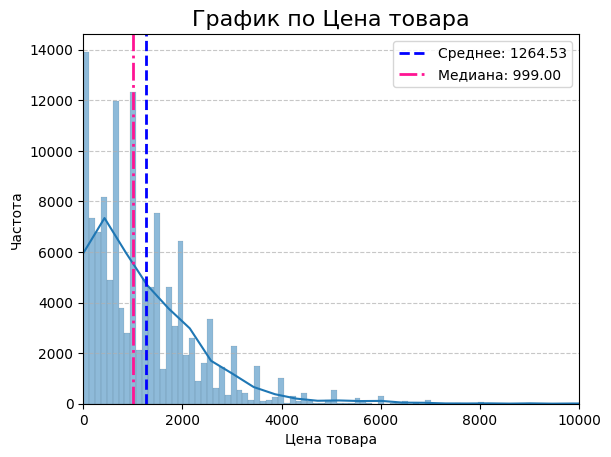

In [46]:
# Построение графика
sns.histplot(
    data=ap,
    x='price',
    kde=True,
);
plt.title(f'График по {list_field_ap["price"]}', fontsize=16)
plt.xlabel(list_field_ap["price"])
plt.ylabel('Частота');
mean_val = np.mean(ap["price"])
median_val = np.median(ap["price"])
plt.axvline(
    mean_val,
    color='blue',
    linestyle='--',
    linewidth=2,
    label=f'Среднее: {mean_val:.2f}'
)
plt.axvline(
    median_val,
    color='deeppink',
    linestyle='-.',
    linewidth=2,
    label=f'Медиана: {median_val:.2f}'
)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlim(0, 10000)
plt.legend()
plt.show();

**<span style='color:green'>Мини вывод:</span>**

- Основной спрос на товары меньше 2000
- больше спрос на товары с меньшей ценой

**Анализ поля: <span style='color:red'>category_ids</span>**

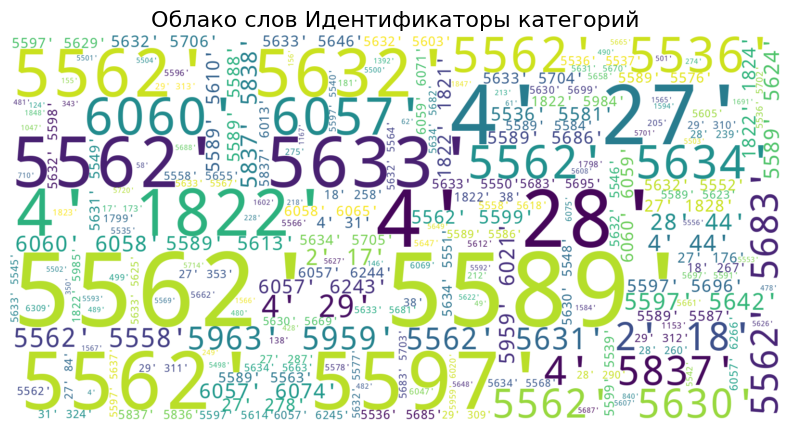

In [47]:
# Получить уникальные значения
unique_model = ap['category_ids'].unique().tolist()
# Получить строчку и уникальных значений
text_unique_model = ' '.join(unique_model)
# Подготовка к показу
wordcloud_model = WordCloud(width=1600, height=800, background_color='white', colormap='viridis').generate(text_unique_model)
# Построение композиции
plt.figure(figsize=(10, 5))
plt.title(f'Облако слов {list_field_ap["category_ids"]}', fontsize=16)
plt.imshow(wordcloud_model, interpolation='bilinear')
plt.axis('off')
plt.show()

**<span style='color:green'>Мини вывод:</span>**

- Самые популярные категории товаров `5562`, `5589`, `5597`, `4`, `27`

### Анализ данных датафрейма <span style='color:red'>am</span> по каждому признаку

In [48]:
# Показать колонки
am.columns

Index(['bulk_campaign_id', 'client_id', 'message_id', 'event', 'channel',
       'date', 'created_at'],
      dtype='object')

In [49]:
# Презинтационый список полей
list_field_am = {
    'bulk_campaign_id': 'Идентификатор рассылки',
    'client_id': 'Идентификатор клиента',
    'message_id': 'Идентификатор сообщения',
    'event': 'Действие с сообщением (отправлено, открыто, покупка…)',
    'channel': 'Канал рассылки',
    'date': 'Дата действия',
    'created_at': 'Дата-время полностью',
}

**Анализ поля: <span style='color:red'>event</span>**

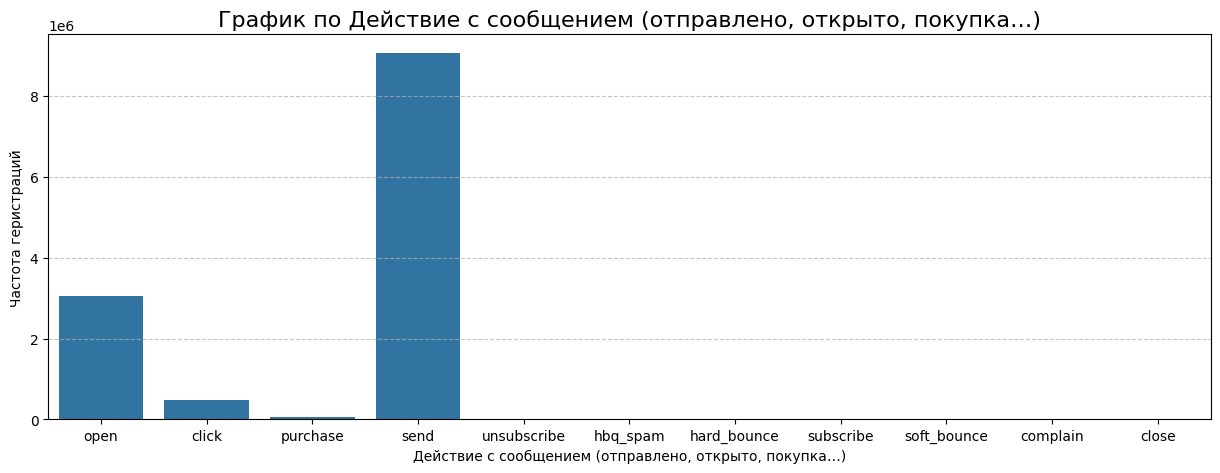

In [50]:
# Строю график
plt.figure(figsize=(15, 5))
sns.countplot(
    x='event',
    data=am
)
plt.title(f'График по {list_field_am["event"]}', fontsize=16)
plt.xlabel(list_field_am["event"])
plt.ylabel('Частота геристраций');
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**<span style='color:green'>Мини вывод:</span>**

- Отправка занемает большую часть сообщений
- Открывают 1/3 часть сообщений
- Переходят где то 1/20
- Производят покупку ещё меньше

**Анализ поля: <span style='color:red'>channel</span>**

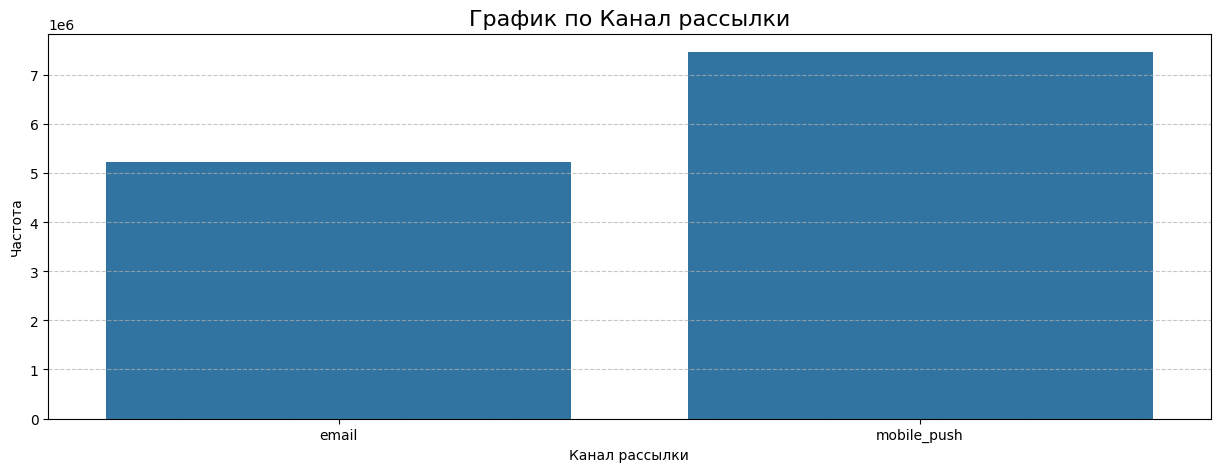

In [51]:
# Строю график
plt.figure(figsize=(15, 5))
sns.countplot(
    x='channel',
    data=am
)
plt.title(f'График по {list_field_am["channel"]}', fontsize=16)
plt.xlabel(list_field_am["channel"])
plt.ylabel('Частота')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**<span style='color:green'>Мини вывод:</span>**

- `email` расылка меньше по сравнению с `mobile_push` уведомлениями

**<span style='color:Purple'>Вывод шага:</span>**

- Восновном покупают по одному товару
- Больше 30 товаров не заказывают
- Основной спрос на товары меньше 2000
- больше спрос на товары с меньшей ценой
- Самые популярные категории товаров `5562`, `5589`, `5597`, `4`, `27`
- Отправка занемает большую часть сообщений
- Открывают 1/3 часть сообщений
- Переходят где то 1/20
- Производят покупку ещё меньше
- `email` расылка меньше по сравнению с `mobile_push` уведомлениями

## <span style='color:Blue'> Шаг. Объеденения датафреймов</span>

In [52]:
# показ фрейма
ap.head(3)

,client_id,quantity,price,category_ids,date,message_id
0,1515915625468169594,1,"1,999.00","['4', '28', '57', '431']",2022-05-16,1515915625468169594-4301-627b661e9736d
1,1515915625468169594,1,"2,499.00","['4', '28', '57', '431']",2022-05-16,1515915625468169594-4301-627b661e9736d
2,1515915625471138230,1,"6,499.00","['4', '28', '57', '431']",2022-05-16,1515915625471138230-4437-6282242f27843


In [53]:
# показ фрейма
am.head(3)

,bulk_campaign_id,client_id,message_id,event,channel,date,created_at
0,4439,1515915625626736623,1515915625626736623-4439-6283415ac07ea,open,email,2022-05-19,2022-05-19 00:14:20
1,4439,1515915625490086521,1515915625490086521-4439-62834150016dd,open,email,2022-05-19,2022-05-19 00:39:34
2,4439,1515915625553578558,1515915625553578558-4439-6283415b36b4f,open,email,2022-05-19,2022-05-19 00:51:49


In [54]:
# показ фрейма
atb.head(3)

,client_id,target
0,1515915625468060902,False
1,1515915625468061003,True
2,1515915625468061099,False


In [55]:
# Обеденения датафреймов
full_df = pd.merge(ap, am, on=['message_id', 'client_id', 'date'], how='inner')

In [56]:
# Обеденения датафреймов
full_df = pd.merge(full_df, atb, on=['client_id'], how='inner')

In [57]:
# Обеденения датафреймов
full_df = pd.merge(full_df, de, on=['date', 'bulk_campaign_id'], how='inner')

In [58]:
# Показываю информацию о дата сете
primary_information_output(full_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343704 entries, 0 to 343703
Data columns (total 33 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   client_id            343704 non-null  int64         
 1   quantity             343704 non-null  int64         
 2   price                343704 non-null  float64       
 3   category_ids         343704 non-null  object        
 4   date                 343704 non-null  datetime64[ns]
 5   message_id           343704 non-null  object        
 6   bulk_campaign_id     343704 non-null  int64         
 7   event                343704 non-null  object        
 8   channel              343704 non-null  object        
 9   created_at           343704 non-null  datetime64[ns]
 10  target               343704 non-null  bool          
 11  count_click          343704 non-null  int64         
 12  count_complain       343704 non-null  int64         
 13  count_hard_bou

,Наименование признака,Количество пропущеных,Доля пропущеных
0,client_id,0,0.00
1,quantity,0,0.00
2,price,0,0.00
3,category_ids,0,0.00
4,date,0,0.00
5,message_id,0,0.00
6,bulk_campaign_id,0,0.00
7,event,0,0.00
8,channel,0,0.00
9,created_at,0,0.00


Количество полных дублированых строк в дата фрейме = 0, Доля полных дублей = 0.0%


,client_id,quantity,price,category_ids,date,message_id,bulk_campaign_id,event,channel,created_at,...,nunique_open,nunique_purchase,nunique_send,nunique_soft_bounce,nunique_subscribe,nunique_unsubscribe,count_hbq_spam,nunique_hbq_spam,count_close,nunique_close
0,1515915625468075433,1,"1,499.00","['4', '28', '275', '421']",2022-05-19,1515915625468075433-4439-6283413d20f00,4439,purchase,email,2022-05-19 14:34:43,...,6317,29,0,8,5,294,0,0,0,0
1,1515915625468075433,2,"1,999.00","['4', '28', '275', '421']",2022-05-19,1515915625468075433-4439-6283413d20f00,4439,purchase,email,2022-05-19 14:34:43,...,6317,29,0,8,5,294,0,0,0,0
2,1515915625468075433,1,"1,999.00","['4', '28', '275', '421']",2022-05-19,1515915625468075433-4439-6283413d20f00,4439,purchase,email,2022-05-19 14:34:43,...,6317,29,0,8,5,294,0,0,0,0
3,1515915625468145616,1,"1,499.00","['4', '28', '343', '425']",2022-05-19,1515915625468145616-4439-628341568525c,4439,purchase,email,2022-05-19 09:21:24,...,6317,29,0,8,5,294,0,0,0,0
4,1515915625468213881,1,499.00,"['5562', '5536', '5581', '602']",2022-05-19,1515915625468213881-4463-6285e40c8ef7a,4463,send,email,2022-05-19 06:41:45,...,64527,35,467884,1742,9,424,8,8,0,0


**<span style='color:green'>Мини вывод:</span>**

- Хорошобы знать как в дальнейшем будет происходить получение новых данных и обучение течения определёного периода
- Неуверен что обеденил правильно поэтому использовал для обединения inner черес 3 признаков.
- Сакже думаю нужно оталкиваться от фрейма `ap`
- Не совсем логически неправильно построена труктура базы полученых фреймов

## <span style='color:Blue'> Шаг. Разработка полезных признаков</span>

**Задача 6.1. Подробный вывод датафрейма**

In [59]:
# Показываю информацию о дата сете
primary_information_output(full_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343704 entries, 0 to 343703
Data columns (total 33 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   client_id            343704 non-null  int64         
 1   quantity             343704 non-null  int64         
 2   price                343704 non-null  float64       
 3   category_ids         343704 non-null  object        
 4   date                 343704 non-null  datetime64[ns]
 5   message_id           343704 non-null  object        
 6   bulk_campaign_id     343704 non-null  int64         
 7   event                343704 non-null  object        
 8   channel              343704 non-null  object        
 9   created_at           343704 non-null  datetime64[ns]
 10  target               343704 non-null  bool          
 11  count_click          343704 non-null  int64         
 12  count_complain       343704 non-null  int64         
 13  count_hard_bou

,Наименование признака,Количество пропущеных,Доля пропущеных
0,client_id,0,0.00
1,quantity,0,0.00
2,price,0,0.00
3,category_ids,0,0.00
4,date,0,0.00
5,message_id,0,0.00
6,bulk_campaign_id,0,0.00
7,event,0,0.00
8,channel,0,0.00
9,created_at,0,0.00


Количество полных дублированых строк в дата фрейме = 0, Доля полных дублей = 0.0%


,client_id,quantity,price,category_ids,date,message_id,bulk_campaign_id,event,channel,created_at,...,nunique_open,nunique_purchase,nunique_send,nunique_soft_bounce,nunique_subscribe,nunique_unsubscribe,count_hbq_spam,nunique_hbq_spam,count_close,nunique_close
0,1515915625468075433,1,"1,499.00","['4', '28', '275', '421']",2022-05-19,1515915625468075433-4439-6283413d20f00,4439,purchase,email,2022-05-19 14:34:43,...,6317,29,0,8,5,294,0,0,0,0
1,1515915625468075433,2,"1,999.00","['4', '28', '275', '421']",2022-05-19,1515915625468075433-4439-6283413d20f00,4439,purchase,email,2022-05-19 14:34:43,...,6317,29,0,8,5,294,0,0,0,0
2,1515915625468075433,1,"1,999.00","['4', '28', '275', '421']",2022-05-19,1515915625468075433-4439-6283413d20f00,4439,purchase,email,2022-05-19 14:34:43,...,6317,29,0,8,5,294,0,0,0,0
3,1515915625468145616,1,"1,499.00","['4', '28', '343', '425']",2022-05-19,1515915625468145616-4439-628341568525c,4439,purchase,email,2022-05-19 09:21:24,...,6317,29,0,8,5,294,0,0,0,0
4,1515915625468213881,1,499.00,"['5562', '5536', '5581', '602']",2022-05-19,1515915625468213881-4463-6285e40c8ef7a,4463,send,email,2022-05-19 06:41:45,...,64527,35,467884,1742,9,424,8,8,0,0


**Задача 6.2. Добавление номер месяца**

In [60]:
# Получаем месяц
full_df['month'] = full_df['date'].dt.month

**Задача 6.3. Добавление время года**

In [61]:
def season_year(row):
    """
    Добавляем сезон
    """
    month = row['month']
    if month in [12, 1, 2]:
        return 'зима'
    elif month in [3, 4, 5]:
        return 'весна'
    elif month in [6, 7, 8]:
        return 'лето'
    return 'осень'

In [62]:
# Получаем сезон времени года
full_df['season'] = full_df.apply(season_year, axis=1)

**Задача 6.4. Добавление день недели**

In [63]:
# Получаем день недели 
full_df['weekday'] = full_df['date'].dt.weekday

**Задача 6.5. Добавление час покупки**

In [64]:
# Получаем день недели 
full_df['hour'] = full_df['created_at'].dt.hour

**Задача 6.6. Добавляем рейтинк изходя из уникальных значений**

In [65]:
# Собираю рейтинг
category_ids_counts = full_df['category_ids'].value_counts().to_dict()

In [66]:
def category_ids_to_counts(row):
    """
    Присваиваем количество значений каждому уникальному значению
    """
    rating = row['category_ids']
    return category_ids_counts[rating]

In [67]:
# Получаем рейтинг
full_df['rating'] = full_df.apply(category_ids_to_counts, axis=1)

**<span style='color:green'>Мини вывод:</span>**

- Скорей всего признак динамический что будет обучаться и популянорости выбраных категорий(Можно назвать такой признак живой :) )
Думаю стоит присматреться как он будет менятся скаждым месяцем (Возможно подходит для програзирования динамических изменений)

**Задача 6.7. Групируем по цене**

In [68]:
# Значения для групировки
cut_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
# Распределения по групировкам
cut_bins = [0, 100, 200, 500, 800, 1000, 1500, 3000, 4000, 86000]
# Создание нового признака
full_df['group_price'] = pd.cut(
    full_df['price'],
    bins=cut_bins,
    labels=cut_labels
)

**Задача 6.8. Проверка результата**

In [69]:
# Показываю информацию о дата сете
primary_information_output(full_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343704 entries, 0 to 343703
Data columns (total 39 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   client_id            343704 non-null  int64         
 1   quantity             343704 non-null  int64         
 2   price                343704 non-null  float64       
 3   category_ids         343704 non-null  object        
 4   date                 343704 non-null  datetime64[ns]
 5   message_id           343704 non-null  object        
 6   bulk_campaign_id     343704 non-null  int64         
 7   event                343704 non-null  object        
 8   channel              343704 non-null  object        
 9   created_at           343704 non-null  datetime64[ns]
 10  target               343704 non-null  bool          
 11  count_click          343704 non-null  int64         
 12  count_complain       343704 non-null  int64         
 13  count_hard_bou

,Наименование признака,Количество пропущеных,Доля пропущеных
0,client_id,0,0.00
1,quantity,0,0.00
2,price,0,0.00
3,category_ids,0,0.00
4,date,0,0.00
5,message_id,0,0.00
6,bulk_campaign_id,0,0.00
7,event,0,0.00
8,channel,0,0.00
9,created_at,0,0.00


Количество полных дублированых строк в дата фрейме = 0, Доля полных дублей = 0.0%


,client_id,quantity,price,category_ids,date,message_id,bulk_campaign_id,event,channel,created_at,...,count_hbq_spam,nunique_hbq_spam,count_close,nunique_close,month,season,weekday,hour,rating,group_price
0,1515915625468075433,1,"1,499.00","['4', '28', '275', '421']",2022-05-19,1515915625468075433-4439-6283413d20f00,4439,purchase,email,2022-05-19 14:34:43,...,0,0,0,0,5,весна,3,14,8849,F
1,1515915625468075433,2,"1,999.00","['4', '28', '275', '421']",2022-05-19,1515915625468075433-4439-6283413d20f00,4439,purchase,email,2022-05-19 14:34:43,...,0,0,0,0,5,весна,3,14,8849,G
2,1515915625468075433,1,"1,999.00","['4', '28', '275', '421']",2022-05-19,1515915625468075433-4439-6283413d20f00,4439,purchase,email,2022-05-19 14:34:43,...,0,0,0,0,5,весна,3,14,8849,G
3,1515915625468145616,1,"1,499.00","['4', '28', '343', '425']",2022-05-19,1515915625468145616-4439-628341568525c,4439,purchase,email,2022-05-19 09:21:24,...,0,0,0,0,5,весна,3,9,6104,F
4,1515915625468213881,1,499.00,"['5562', '5536', '5581', '602']",2022-05-19,1515915625468213881-4463-6285e40c8ef7a,4463,send,email,2022-05-19 06:41:45,...,8,8,0,0,5,весна,3,6,395,C


## <span style='color:Blue'> Шаг. Корреляционный анализ</span>

### Создание функции для отрисовки тепловой карты

In [70]:
def heat_map_output(
    data: object,                # Дата фрейм
    list_names_col:dict= None,   # Словарь с претанзиционым наименованием
    number_of_randomness: int=0, # Количество рандомных частей
):
    """
    Функция строит теплавую карту на основании дата фрейма
    """
    if number_of_randomness == 0:
        temp_data = data
    else:
        temp_data = data.sample(number_of_randomness)
    corrective_list = list()
    if list_names_col is None:
        corrective_list = temp_data.columns
    else:
        for x in temp_data.columns:
            corrective_list.append(list_names_col[x])
    temp_data.columns = corrective_list
    quantitative_signs = (
        temp_data.select_dtypes(['float', 'int']).columns.tolist()
    )
    #plt.figure(figsize = (16,16))
    plt.title(
        "Теплавая карта коэффициенты корреляции между всеми признаками в дата фрейме\n",
        fontsize =10
    )
    sns.heatmap(
        temp_data.phik_matrix(interval_cols=quantitative_signs),
        annot=True,
        fmt='.2f'
    );

### Получаем тепловую карту <span style='color:red'>ap</span>

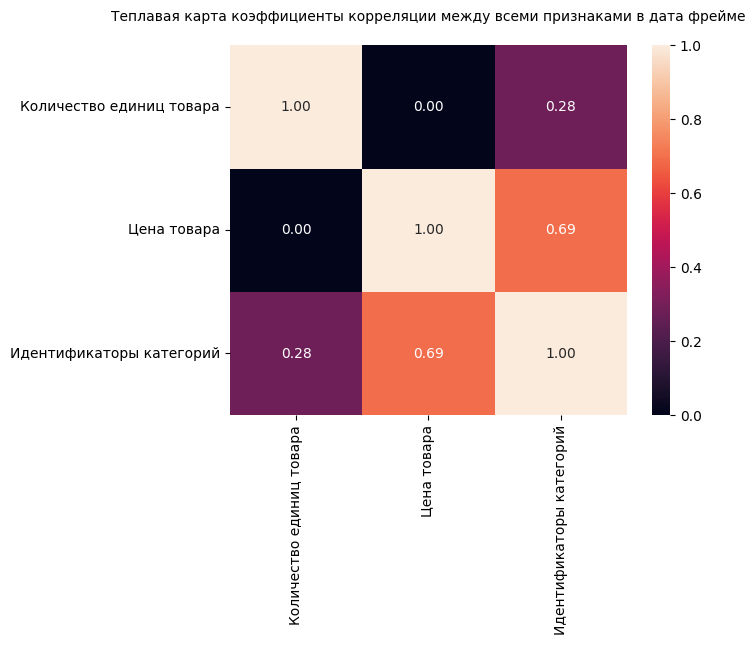

In [71]:
# Перечислим не актуальные признаки для построения
list_non_participating_features = [
    'client_id',
    'date',
    'message_id',
]
# Строим тепловую карту
heat_map_output(
    ap.drop(list_non_participating_features, axis=1),
    list_field_ap
);

**<span style='color:green'>Мини вывод:</span>**

- Будем считать что если кореляция выше или равно `0.9` то мультиколлинеарность присутствует и сетими признаками стоит поработать.
- Не присутствует мультиколлинеарность
- хороший показатель цена с категорией
- есть взаимосвязь категория с количеством

### Получаем тепловую карту <span style='color:red'>am</span>

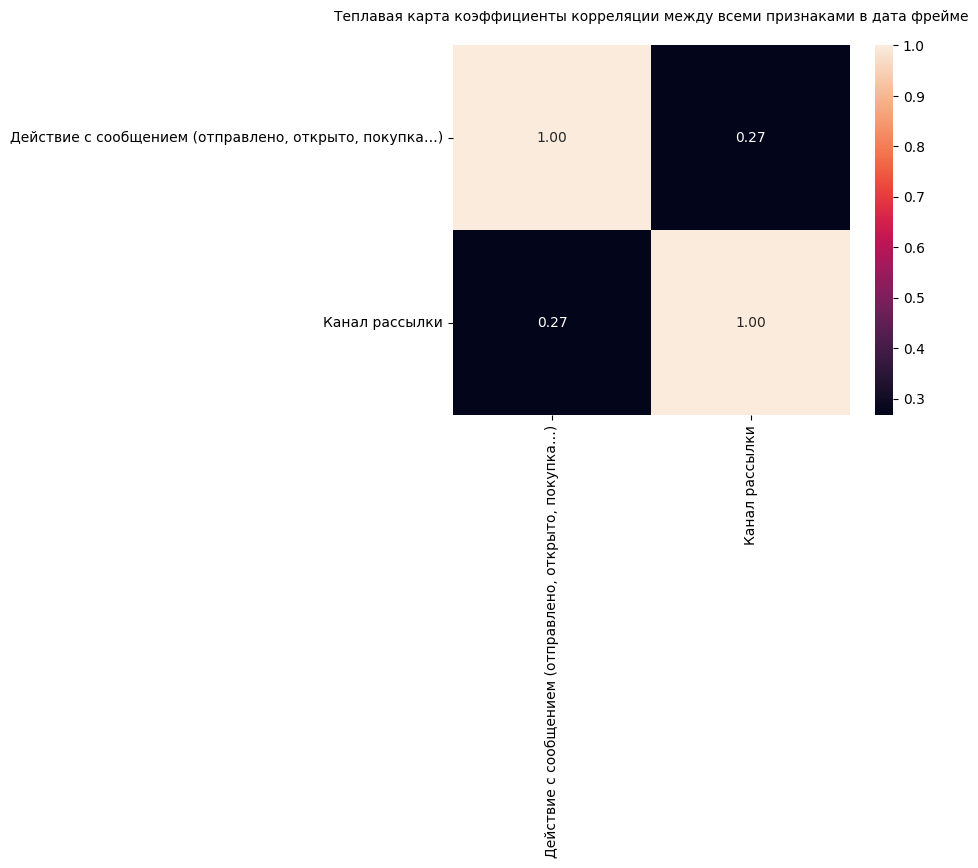

In [72]:
# Перечислим не актуальные признаки для построения
list_non_participating_features = [
    'bulk_campaign_id',
    'client_id',
    'message_id',
    'date',
    'created_at',
]
# Строим тепловую карту
heat_map_output(
    am.drop(list_non_participating_features, axis=1),
    list_field_am,
    10000,
);

**<span style='color:green'>Мини вывод:</span>**

- Будем считать что если кореляция выше или равно `0.9` то мультиколлинеарность присутствует и сетими признаками стоит поработать.
- Не присутствует мультиколлинеарность
- есть небольшая связь между каналам связи и действиями сообщением

### Получаем тепловую карту <span style='color:red'>full_df</span>

In [73]:
# Просмотр колонок
full_df.columns

Index(['client_id', 'quantity', 'price', 'category_ids', 'date', 'message_id',
       'bulk_campaign_id', 'event', 'channel', 'created_at', 'target',
       'count_click', 'count_complain', 'count_hard_bounce', 'count_open',
       'count_purchase', 'count_send', 'count_soft_bounce', 'count_subscribe',
       'count_unsubscribe', 'nunique_click', 'nunique_complain',
       'nunique_hard_bounce', 'nunique_open', 'nunique_purchase',
       'nunique_send', 'nunique_soft_bounce', 'nunique_subscribe',
       'nunique_unsubscribe', 'count_hbq_spam', 'nunique_hbq_spam',
       'count_close', 'nunique_close', 'month', 'season', 'weekday', 'hour',
       'rating', 'group_price'],
      dtype='object')

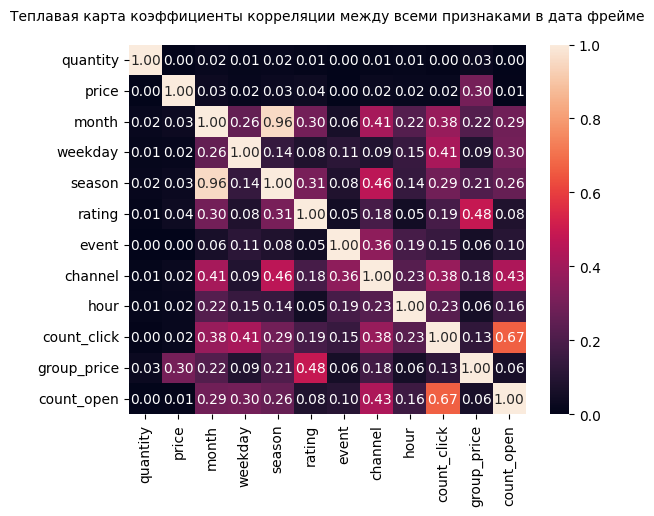

In [74]:
# Перечислим не актуальные признаки для построения
fields_selected = [
    'quantity',
    'price',
    'month',
    'weekday',
    'season',
    'rating',
    'event',
    'channel',
    'hour',
    'count_click',
    'group_price',
    'count_open',
]
# Строим тепловую карту
heat_map_output(full_df[fields_selected]);

**<span style='color:green'>Мини вывод:</span>**

- Будем считать что если кореляция выше или равно `0.9` то мультиколлинеарность присутствует и сетими признаками стоит поработать.
- Есть где присутствует мультиколлинеарность и это очевидно между `season` и `month`
- Несильно выделяются признаки `quantity` и `price` но они важны

## <span style='color:Blue'> Шаг. Подготовка к обучению</span>

**Задача 8.1. Получаем информацию о фрейме**

In [75]:
# Просмотр для распределение признаков
primary_information_output(full_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343704 entries, 0 to 343703
Data columns (total 39 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   client_id            343704 non-null  int64         
 1   quantity             343704 non-null  int64         
 2   price                343704 non-null  float64       
 3   category_ids         343704 non-null  object        
 4   date                 343704 non-null  datetime64[ns]
 5   message_id           343704 non-null  object        
 6   bulk_campaign_id     343704 non-null  int64         
 7   event                343704 non-null  object        
 8   channel              343704 non-null  object        
 9   created_at           343704 non-null  datetime64[ns]
 10  target               343704 non-null  bool          
 11  count_click          343704 non-null  int64         
 12  count_complain       343704 non-null  int64         
 13  count_hard_bou

,Наименование признака,Количество пропущеных,Доля пропущеных
0,client_id,0,0.00
1,quantity,0,0.00
2,price,0,0.00
3,category_ids,0,0.00
4,date,0,0.00
5,message_id,0,0.00
6,bulk_campaign_id,0,0.00
7,event,0,0.00
8,channel,0,0.00
9,created_at,0,0.00


Количество полных дублированых строк в дата фрейме = 0, Доля полных дублей = 0.0%


,client_id,quantity,price,category_ids,date,message_id,bulk_campaign_id,event,channel,created_at,...,count_hbq_spam,nunique_hbq_spam,count_close,nunique_close,month,season,weekday,hour,rating,group_price
0,1515915625468075433,1,"1,499.00","['4', '28', '275', '421']",2022-05-19,1515915625468075433-4439-6283413d20f00,4439,purchase,email,2022-05-19 14:34:43,...,0,0,0,0,5,весна,3,14,8849,F
1,1515915625468075433,2,"1,999.00","['4', '28', '275', '421']",2022-05-19,1515915625468075433-4439-6283413d20f00,4439,purchase,email,2022-05-19 14:34:43,...,0,0,0,0,5,весна,3,14,8849,G
2,1515915625468075433,1,"1,999.00","['4', '28', '275', '421']",2022-05-19,1515915625468075433-4439-6283413d20f00,4439,purchase,email,2022-05-19 14:34:43,...,0,0,0,0,5,весна,3,14,8849,G
3,1515915625468145616,1,"1,499.00","['4', '28', '343', '425']",2022-05-19,1515915625468145616-4439-628341568525c,4439,purchase,email,2022-05-19 09:21:24,...,0,0,0,0,5,весна,3,9,6104,F
4,1515915625468213881,1,499.00,"['5562', '5536', '5581', '602']",2022-05-19,1515915625468213881-4463-6285e40c8ef7a,4463,send,email,2022-05-19 06:41:45,...,8,8,0,0,5,весна,3,6,395,C


**Задача 8.2. Подготовка признаков для обучения и тестирования**

In [76]:
# Укажим целевой признак
target_attribute = 'target'
# Выбираем категориальные признаки
cat_columns = [
    'season',
    'event',
    'channel',
    'group_price',
]
# Выбираем количественые признаки
num_columns = [
    'quantity',
    'price',
    'month',
    'weekday',
    'rating',
    'hour',
    'count_click',
    'count_open',
]
# Собираю поля признаков
selected_fields_of_study = cat_columns + num_columns
# Добавления целевого признака
selected_fields_of_study.append(target_attribute)
# Собираю дата сет
correction_train = full_df[selected_fields_of_study]
# Делим данные на тренировачные и тестовые
X_train, X_test, y_train, y_test = train_test_split(
    correction_train.drop([target_attribute], axis=1),
    correction_train[target_attribute],
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=correction_train[target_attribute],
)

**Задача 8.3. Собираем пайплан из класификационых моделий**

In [77]:
# Создаём структуру кодирование OHE
ohe_pipe = Pipeline(
    [
        ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
)

In [78]:
# Обеденим шаги по подготовке данных
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, cat_columns),
        ('num', StandardScaler(), num_columns),
    ],
    remainder='passthrough'
)

In [79]:
# Создаём словарь из 3 моделеё с параметрами
param_pl = [
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 15),
        'models__max_features': range(2, 15),
        'models__splitter': ['best', 'random'],
        'models__criterion': ['gini', 'entropy'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'],
    },
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 15),
        'models__weights': ['uniform', 'distance'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'],
    },
    {
        'models': [SVC(random_state=RANDOM_STATE)],
        'models__C': [0.01, 0.1, 1, 10, 100],
        'models__gamma': [0.01, 0.1, 1, 10, 100],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'],
    },    
]

In [80]:
# Создаём итоговый пайплан
classification_pl = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE)),
    ]
)

**Задача 8.4. Собираем пайплан CatBoostClassifier**

In [81]:
# Собираем основной пайплан 
cat_pl = Pipeline([
    ('models', CatBoostClassifier(
        random_state=RANDOM_STATE,
        verbose=0,
        cat_features=cat_columns  # указываем категориальные признаки
    ))
])

In [82]:
# Подготовка параметров
cat_param_pl = {
    'models__n_estimators': randint(50, 300),
    'models__learning_rate': uniform(0.01, 0.3),
    'models__depth': randint(4, 10),
    'models__l2_leaf_reg': uniform(1, 10),
    'models__bagging_temperature': uniform(0, 1),
    'models__random_strength': uniform(0, 1),
    'models__grow_policy': ['SymmetricTree', 'Depthwise', 'Lossguide']
}

**Задача 8.5. Собираем пайплан LGBMClassifier**

In [83]:
# Собираем основной пайплан
lgb_pl = Pipeline([
    ('oe', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)),
    ('models', LGBMClassifier(
        random_state=RANDOM_STATE,
        verbose=-1,
        n_jobs=-1
    ))
])

In [84]:
# Подготовка параметров
lgb_param_pl = {
    'models__n_estimators': randint(50, 300),
    'models__learning_rate': uniform(0.01, 0.3),
    'models__max_depth': randint(3, 12),
    'models__num_leaves': randint(10, 100),
    'models__min_child_samples': randint(10, 100),
    'models__subsample': uniform(0.5, 0.5),
    'models__colsample_bytree': uniform(0.5, 0.5),
    'models__reg_alpha': uniform(0, 1),
    'models__reg_lambda': uniform(0, 1),
}

## <span style='color:Blue'> Шаг. Обучение улучшей модели</span>

**Задача 9.1. Поодготовка к сбору результатов**

In [85]:
# Создание пустого датафрейма
final_result_for_madeleine = pd.DataFrame(
    {'Наименование модели': [], 'ROC_AUC': [],}
)

**Задача 9.2. Обучение с помощью класификацией**

In [86]:
# Производим поиск по сетке всех возможных вариантов лучшей модели
best_model = RandomizedSearchCV(
    classification_pl,
    param_pl,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    n_iter=20,
    random_state=RANDOM_STATE,
)

In [87]:
from tqdm.notebook import tqdm

In [88]:
%%time
# Обучение модели на тренировачной выборки
best_model.fit(X_train, y_train);

CPU times: user 4.89 s, sys: 723 ms, total: 5.61 s
Wall time: 6min 21s


In [89]:
# Получаю результаты
result = pd.DataFrame(best_model.cv_results_)
# Вывожу результат топ 3 лучших маделей с параметрами
top_best_model = result[
    ['rank_test_score', 'param_models', 'mean_test_score', 'params']
].sort_values('rank_test_score').head(3)
# Получаю имя лучшей мадели 
name_best_model = result.sort_values('rank_test_score').head(1).param_models.iloc[0]
# Получаю лучшую модель
top_madeleine = best_model.best_estimator_
# Получаю предсказаную пробу лучшей мадели
y_test_predict_proba = top_madeleine.predict_proba(X_test)[:, 1]
# Предсказание с фиксацией времени
y_test_roc_auc = roc_auc_score(y_test, y_test_predict_proba)

In [90]:
# Запись результатов
final_result_for_madeleine.loc[len(final_result_for_madeleine)] = [
    name_best_model,
    y_test_roc_auc,
]

**Задача 9.3. Обучение с помощью CatBoostClassifier**

In [91]:
# Производим поиск по сетке всех возможных вариантов лучшей модели
best_model_CBC = RandomizedSearchCV(
    cat_pl,
    cat_param_pl,
    n_iter=40,                
    cv=5,                   
    scoring='roc_auc',     
    n_jobs=-1,           
    random_state=RANDOM_STATE,
)

In [92]:
%%time
# Обучение модели на тренировачной выборки
best_model_CBC.fit(X_train, y_train);

CPU times: user 3min 53s, sys: 19.1 s, total: 4min 12s
Wall time: 28min 38s


In [93]:
# Получаю лучшую модель
top_madeleine_cat = best_model_CBC.best_estimator_
# Получаю предсказаную пробу лучшей мадели
y_test_predict_proba_cat = top_madeleine_cat.predict_proba(X_test)[:, 1]
# Предсказание с фиксацией времени
y_test_roc_auc_cat = roc_auc_score(y_test, y_test_predict_proba_cat)

In [94]:
# Запись результатов
final_result_for_madeleine.loc[len(final_result_for_madeleine)] = [
    'CatBoostClassifier',
    y_test_roc_auc_cat,
]

**Задача 9.4. Обучение с помощью LGBMClassifier**

In [95]:
# Производим поиск по сетке всех возможных вариантов лучшей модели
best_model_LGB = RandomizedSearchCV(
    lgb_pl,
    lgb_param_pl,
    n_iter=40,                
    cv=5,                   
    scoring='roc_auc',     
    n_jobs=-1,           
    random_state=RANDOM_STATE,
)

In [96]:
%%time
# Обучение модели на тренировачной выборки
best_model_LGB.fit(X_train, y_train);

CPU times: user 19.6 s, sys: 5.31 s, total: 24.9 s
Wall time: 3min 14s


In [97]:
# Получаю лучшую модель
top_madeleine_lgb = best_model_LGB.best_estimator_
# Получаю предсказаную пробу лучшей мадели
y_test_predict_proba_lgb = top_madeleine_lgb.predict_proba(X_test)[:, 1]
# Предсказание с фиксацией времени
y_test_roc_auc_lgb = roc_auc_score(y_test, y_test_predict_proba_lgb)

In [98]:
# Запись результатов
final_result_for_madeleine.loc[len(final_result_for_madeleine)] = [
    'LGBMClassifier',
    y_test_roc_auc_lgb,
]

## <span style='color:Blue'> Шаг. Проанализируем обученые модели</span>

**Задача 10.1. Создание функции отображение кривой ROC_AUC**

In [99]:
def plotting_the_curve_roc_auc(
    y_test,
    y_test_predict_proba,
    y_test_roc_auc,
    title,
):
    """
    Построение ROC‑кривой
    """
    fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_proba)
    plt.plot(fpr, tpr, label=f'ROC кривая (AUC = {y_test_roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
    plt.xlabel('Частота ложных показатель')
    plt.ylabel('Частота положительный показатель')
    plt.title(title)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    plt.show()

**Задача 10.2. Обучение с помощью класификацией**

In [100]:
print('Лучшая модель и её параметры:\n\n', best_model.best_estimator_ )

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['season', 'event', 'channel',
                                                   'group_price']),
                                                 ('num', 'passthrough',
                   

In [101]:
# Показ топ 3 мадели
top_best_model

,rank_test_score,param_models,mean_test_score,params
7,1,KNeighborsClassifier(),0.95,"{'preprocessor__num': 'passthrough', 'models__..."
5,2,DecisionTreeClassifier(random_state=12345),0.78,"{'preprocessor__num': RobustScaler(), 'models_..."
6,3,DecisionTreeClassifier(random_state=12345),0.74,"{'preprocessor__num': MinMaxScaler(), 'models_..."


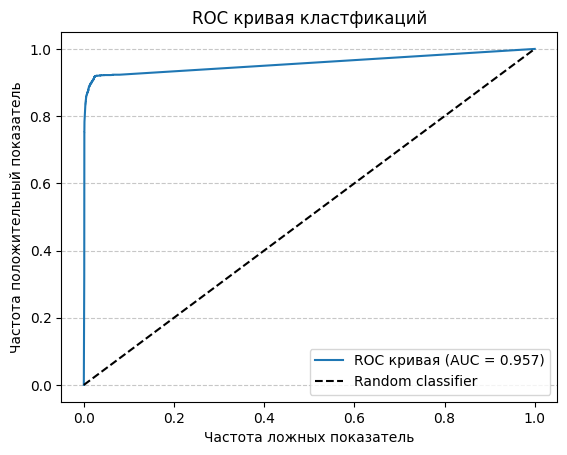

In [102]:
# Построение ROC‑кривой
plotting_the_curve_roc_auc(
    y_test,
    y_test_predict_proba,
    y_test_roc_auc,
    'ROC кривая кластфикаций',
);

**Задача 10.3. Обучение с помощью CatBoostClassifier**

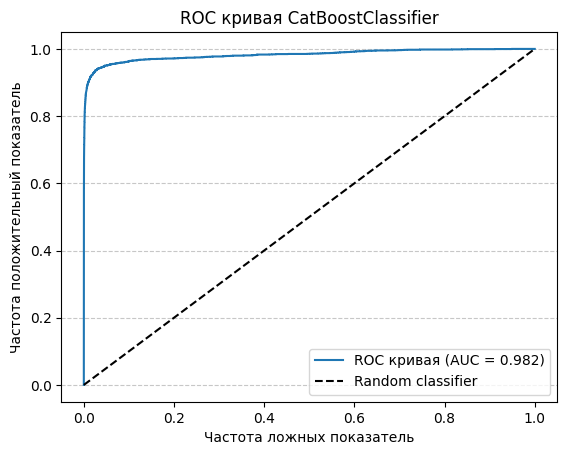

In [103]:
# Построение ROC‑кривой
plotting_the_curve_roc_auc(
    y_test,
    y_test_predict_proba_cat,
    y_test_roc_auc_cat,
    'ROC кривая CatBoostClassifier',
);

**Задача 10.4. Обучение с помощью LGBMClassifier**

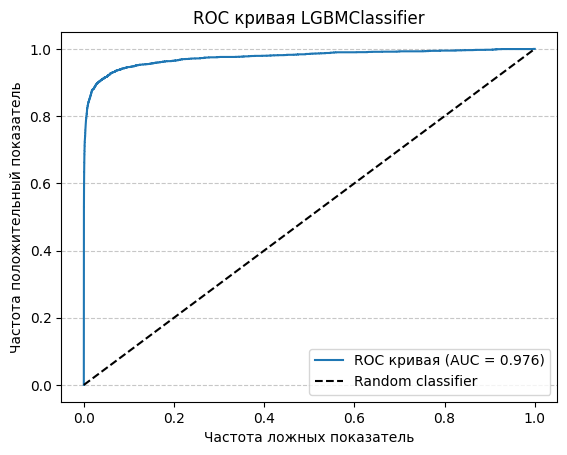

In [104]:
# Построение ROC‑кривой
plotting_the_curve_roc_auc(
    y_test,
    y_test_predict_proba_lgb,
    y_test_roc_auc_lgb,
    'ROC кривая LGBMClassifier',
);

**Задача 10.5. Полученые результаты**

In [105]:
# Вывод полученых результатов
(final_result_for_madeleine
 .sort_values(by='ROC_AUC')
 .style
 .format({'ROC_AUC': '{:.3f}'})
 .highlight_max(color='SpringGreen', subset=['ROC_AUC'])
 .highlight_min(color='LightSalmon', subset=['ROC_AUC'])
)

,Наименование модели,ROC_AUC
0,KNeighborsClassifier(),0.957
2,LGBMClassifier,0.976
1,CatBoostClassifier,0.982


**<span style='color:green'>Мини вывод:</span>**

- Все модели показали хороший результат но думаю можно улучшить ещё
- Самый лучший результат та что помеченна зелёным
- С ниским результатом выделенна красным
- Одолевают смутные сомнения хорошобы проверить на новых данных 

# <span style='color:RoyalBlue'>Итоговые выводы</span>

### Анализ полученых данные:

<span style='font-size:18px'>

- Столбец `message_id` имеет трёх группавую структуру через `-`. 1) - `client_id`  2) - `bulk_campaign_id` 3) - `<Индификатор сообщения>`
- Есть дубли но эта скорей всего и за не полном представление всей таблицы
- Хорошее наименование солонок
- Разнообразных признаков очень много у датафреймов `de` и `dec`
- Отсутствуют пропуски
- Есть где можно поменять тип данных нужно расмотреть тщательнее
- У таргета значения сильно большая раздница в значениях также и у стальных категориальных данных
- По полю даты разнятся в разных вреймах
- Есть интересные показатели во собенности максимальных значений? в варфреймах `de` и `dec`
- Основные квартили в метах 25%, 50%, 75% проступают нули в варфреймах `de` и `dec`
- Покупки в основном купленые по штуке
- Товар за `1рубль` Странно это ??? 1) Возможно скидка 2) Специальное выграшное предложение 3) Возможно ошибка
- Есть постояные однотипные заказы
- Есть уникальные заказы

### Иследовательский анализ данных:

<span style='font-size:18px'>

- Восновном покупают по одному товару
- Больше 30 товаров не заказывают
- Основной спрос на товары меньше 2000
- больше спрос на товары с меньшей ценой
- Самые популярные категории товаров `5562`, `5589`, `5597`, `4`, `27`
- Отправка занемает большую часть сообщений
- Открывают 1/3 часть сообщений
- Переходят где то 1/20
- Производят покупку ещё меньше
- `email` расылка меньше по сравнению с `mobile_push` уведомлениями

### Таблица сравнений разных моделий:

In [106]:
# Вывод полученых результатов
(final_result_for_madeleine
 .sort_values(by='ROC_AUC')
 .style
 .format({'ROC_AUC': '{:.3f}'})
 .highlight_max(color='SpringGreen', subset=['ROC_AUC'])
 .highlight_min(color='LightSalmon', subset=['ROC_AUC'])
)

,Наименование модели,ROC_AUC
0,KNeighborsClassifier(),0.957
2,LGBMClassifier,0.976
1,CatBoostClassifier,0.982


**<span style='color:green'>Мини вывод:</span>**

- Все модели показали хороший результат но думаю можно улучшить ещё
- Самый лучший результат та что помеченна зелёным
- С ниским результатом выделенна красным
- Одолевают смутные сомнения хорошобы проверить на новых данных 

### Итоговый результат:

<span style='font-size:18px'>

В ходе работы были получены 5 срезов данных за период с мая 2022 г. по май 2024 г. При первичном анализе выявлено расхождение во временных метках — интервалы между точками сбора данных неравномерны, что может влиять на корректность последующих расчётов.

- После загрузки данных проведён аудит качества:
    - обнаружены дубликаты записей (требует дополнительной фильтрации);
    - структурное состояние полей признано удовлетворительным — отсутствуют критические пропуски или некорректные форматы.
- На этапе предобработки выявлен дисбаланс целевого признака:
    - количество положительных случаев (фактов покупки) существенно ниже отрицательных, что ограничивает разнообразие обучающей выборки и может снизить качество модели.
- Анализ поведенческих паттернов показал:
    - преобладающий сценарий — покупка 1 товара (модальное значение);
    - диапазон типичных сумм транзакций: 1–2 000 ед. валюты;
    - при превышении порога в 2 000 ед. наблюдается резкий спад частоты покупок, что указывает на чувствительность клиентов к стоимости.

В результате анализа категориальной структуры выделены наиболее популярные товарные группы: 5562, 5589, 5597, 4, 27. Эти категории формируют основу потребительского спроса и могут быть приоритетными для прогнозирования.

Для построения модели было обеденены четыре исходных датафрейма в единый набор данных full_df.
Проведено обучение и тестирование пяти алгоритмов машинного обучения, различающихся по архитектуре и подходу к классификации.
Оценка качества выполнялась по метрикам: ROC_AUC.
По итогам экспериментов выбрана оптимальная модель, демонстрирующая наилучшие показатели предсказания вероятности покупки в течение 90 дней.

### Предложения по улучшению:

<span style='font-size:18px'>

- Хорошо бы иметь представление о человеке (Возраст, пол, интересы и т.д.)
- Есть места где человек раслябляется или напрегается и это происходит в разных местах так можно уловить предпочтения вероятности покупки возможно даже в разрезе.
Если учитывать место нахождения человека эта его характеризует, хотябы взять где живёт это говорит о уровне дохода как минемум или возможностях.